In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df=pd.read_csv('titanic_toy.csv')
df.sample(5)

,Age,Fare,Family,Survived
815,NaN,0.000,0,0
795,39.0,13.000,0,0
26,NaN,7.225,0,0
87,NaN,8.050,0,0
766,NaN,39.600,0,0


In [76]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [77]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [78]:
# age and fare is having null values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 3), (179, 3), (712,), (179,))

# Using simple Imputer

In [80]:
from sklearn.impute import SimpleImputer

In [81]:
# IQR=31.206250-7.895800
# IQR
# df['Fare'] :left skewed data h toh usko fill krnge IQR se jo ki df.describe se mil jayega or jo normal dirtributed dataset hote h jese Df['AGe ']unko hm mean-3*std or +3*std se fill krste h end_of_distribution mei

In [82]:
std=x_train['Age'].std()

In [83]:
fill_age=x_train['Age'].mean()+3*std
fill_age

72.99902276532316

In [84]:
std=x_train['Fare'].std()

In [85]:
fill_fare=x_train['Fare'].mean()-3*std
fill_fare

-125.11876550906786

In [86]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [87]:
imputer1=SimpleImputer(strategy='constant',fill_value=fill_age)
imputer2=SimpleImputer(strategy='constant',fill_value=fill_fare)


In [88]:
from sklearn.compose import ColumnTransformer

# Using columnsTRanformer

In [89]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [90]:
trf.fit(x_train)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=72.99902276532316,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=-125.11876550906786,
                                               strategy='constant'),
                                 ['Fare'])])

In [91]:
trf.named_transformers_['imputer1'].statistics_

array([72.99902277])

In [92]:
trf.named_transformers_['imputer2'].statistics_

array([-125.11876551])

In [93]:
x_train_transform=trf.transform(x_train)
x_test_transform=trf.transform(x_test)

In [94]:
x_train_transform

array([[  45.5       ,   28.5       ,    0.        ],
       [  23.        ,   13.        ,    0.        ],
       [  32.        ,    7.925     ,    0.        ],
       ...,
       [  41.        , -125.11876551,    2.        ],
       [  14.        ,  120.        ,    3.        ],
       [  21.        ,   77.2875    ,    1.        ]])

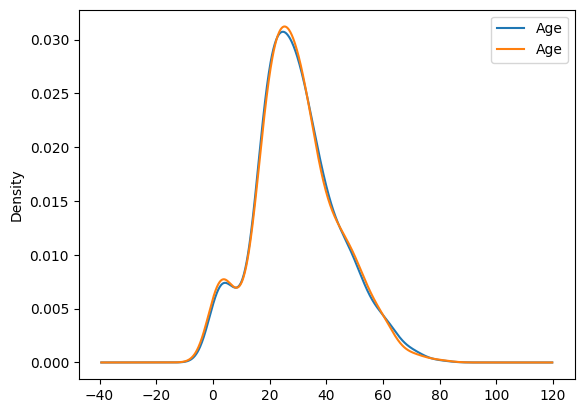

In [97]:
fig=plt.size=(15,6)
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
x_train['Age'].plot(kind='kde',ax=ax)
ax.legend()

<Axes: ylabel='Density'>

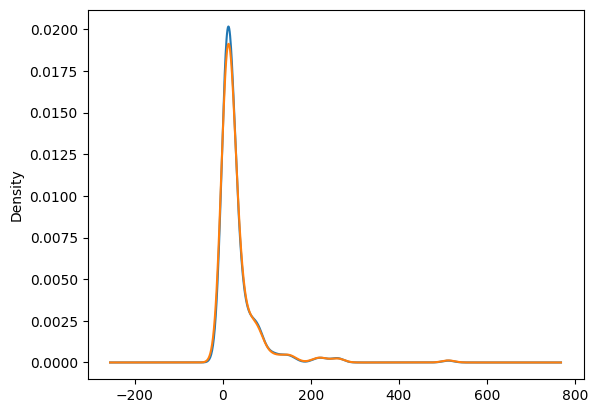

In [96]:
fig=plt.size=(15,8)
fig = plt.figure()
ax = fig.add_subplot(111)
df['Fare'].plot(kind='kde',ax=ax)
x_train['Fare'].plot(kind='kde',ax=ax)